In [1]:
from frequency import FrequencyData 
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [3]:
frequency = FrequencyData('../data-crawling/frequencyData', 250)
ingredientsIdArr = frequency.clean(1, 100000000)
print(len(ingredientsIdArr))
print(ingredientsIdArr)
print(frequency.data['frequency'])
print(frequency.data['recipeId'][400])

1908
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 217, 218, 219, 221, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 237, 238, 239, 241, 242, 243, 2

In [4]:
print(ingredientsIdArr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 217, 218, 219, 221, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 237, 238, 239, 241, 242, 243, 244, 2

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.cluster import DBSCAN, KMeans

def classification(frequency, eps=1):
    decomposing = ("decomposing", PCA(n_components=20))
    model = DBSCAN(eps=eps, min_samples=3)
    # model = KMeans(n_clusters=100)
    modeling = ("modeling", model)
    pipeline = Pipeline([decomposing, modeling])

    # scorer = {
    #     "accuracy": "accuracy",
    #     "precision": "precision",
    #     "recall": "recall",
    #     "f1": make_scorer(f1_score),
    # }

    # result = cross_validate(
    #     pipeline, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring=scorer, return_estimator=False, return_train_score=True
    # )

    # result = model.fit(frequency)
    result = pipeline.fit(frequency.data['frequency'])

    return result

In [23]:
clusterResult = classification(frequency, 0.2)
print(clusterResult)
print(max(clusterResult[1].labels_)+15)

Pipeline(steps=[('decomposing', PCA(n_components=20)),
                ('modeling', DBSCAN(eps=0.2, min_samples=3))])
181


In [13]:
from sklearn.manifold import TSNE
figResult = TSNE(n_components=2, random_state=42).fit_transform(frequency.data['frequency'])


In [65]:
figResult

array([[ -0.8016718,  -1.9125363,  19.560604 ],
       [-33.419174 , -14.092247 ,  -4.220085 ],
       [-17.229557 , -31.377592 ,  10.916589 ],
       ...,
       [-21.818901 ,  12.749504 , -26.697376 ],
       [ -0.7933308,   9.883154 ,  29.511778 ],
       [  4.3423295,  14.304513 ,   5.960046 ]], dtype=float32)

In [140]:

clusterResult = classification(figResult, 1.5)
print(max(clusterResult.labels_)+1)

193


In [147]:
print(clusterResult[1].labels_)

[0 0 0 ... 0 0 0]


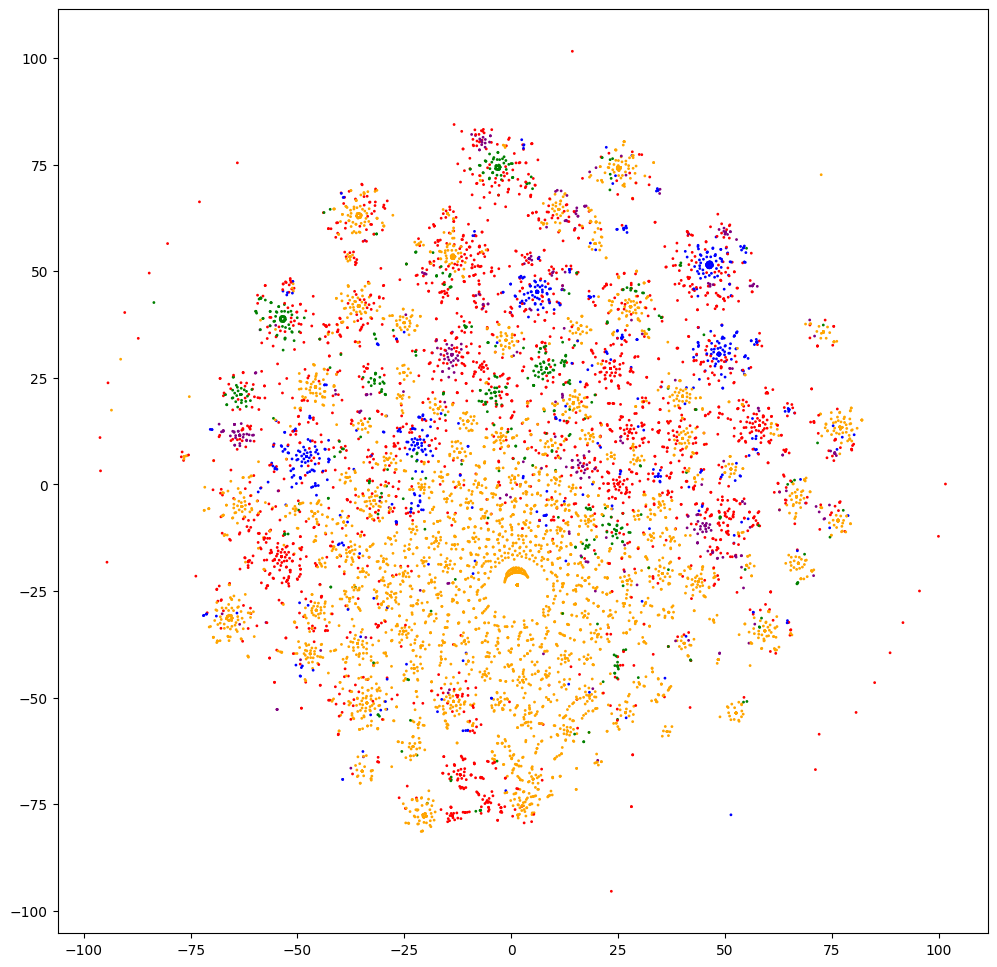

In [24]:
import itertools
colorDict = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue',
    5: 'purple',
}

# labelArr = (clusterResult.labels_+1)/max(clusterResult.labels_+1)

colorCycle = itertools.cycle(['red', 'orange', 'green', 'blue', 'purple'])
colorArr = [next(colorCycle) for _ in range(max(clusterResult[1].labels_ + 2))]

plt.figure(figsize=(12,12))
# plt.scatter(figResult[:, 0], figResult[:, 1], s=1, c=[cm.rainbow(x) for x in labelArr])
plt.scatter(figResult[:, 0], figResult[:, 1], s=1, c=[colorArr[x] for x in clusterResult[1].labels_+1])
# figure = plt.figure(figsize=(12,12))
# ax = figure.add_subplot(projection='3d')
# ax.set_zlim(-30, 30)
# ax.set_ylim(-30, 30)
# ax.set_xlim(-30, 30)
# ax.scatter(figResult[:, 0], figResult[:, 1], figResult[:, 2],s=2, c=[colorArr[x] for x in clusterResult[1].labels_+1])
# ax.scatter(figResult[:, 0], figResult[:, 1], figResult[:, 2])
plt.show()

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosineResult = cosine_similarity(frequency.data['frequency'])

0.5773502691896258
(array([1168, 1693, 2798, 3628, 4317, 4345, 6480, 6991, 7298, 7808, 8530,
       9331], dtype=int64),)
[0. 0. 0. ... 0. 0. 0.]
6900003
6901244
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

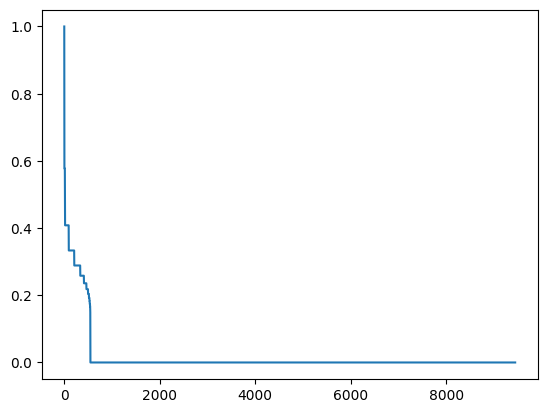

In [28]:
i = 3
sortedArr = sorted(cosineResult[i], reverse=True)
print(sortedArr[1])
print(np.where(cosineResult[i] == sortedArr[1]))
print(cosineResult[3253])
print(frequency.data['recipeId'][i])
print(frequency.data['recipeId'][1168])
print(frequency.data['frequency'][i])
print(frequency.data['frequency'][4344])
plt.plot(sortedArr)
plt.show()

In [106]:
print(clusterResult[1].labels_[3])
print(clusterResult[1].labels_[3253])

3
4
